In [1]:
# WRITE THE POSTERIOR
n <- 20
y <- 7
n.sample <- 1000
p <- seq(1 / n.sample, 1, 1 / n.sample)

# uniform
unif_posterior.star <- dbinom(y, n, p)   # un-normalized posterior
unif_posterior <- unif_posterior.star / (sum(unif_posterior.star) / n.sample)

# Jeffrey's
jeff_posterior.star <- dbinom(y, n, p) / sqrt(p)   # un-normalized posterior
jeff_posterior <- jeff_posterior.star / (sum(jeff_posterior.star) / n.sample)

# step
prior <- rep(0, length(p))

for(i in 1:length(p)){
    if(p[i] <= 0.2){
        prior[i] <- p[i]
    }
    if(p[i] > 0.2 && p[i] <= 0.3){
        prior[i] <- 0.2
    }
    if(p[i] > 0.3 && p[i] <= 0.5){
        prior[i] <- (0.5 - p[i])
    }
    if(p[i] > 0.5){
        prior[i] <- 0
    }
}

step_posterior.star <- dbinom(y, n, p) * prior  # un-normalized posterior
step_posterior <- step_posterior.star / (sum(step_posterior.star) / n.sample)

In [2]:
# FIRST AND SECOND MOMENTS
first <- function(f){
    E.p <- sum(p * f) / n.sample

    return(E.p)
}

stdev <- function(f){
    E_2 <- sum(p^2 * f) / n.sample
    var <- E_2 - first(f)^2
    sigma <- sqrt(var)

    return(sigma)
}

# uniform
unif_mean <- first(unif_posterior)
unif_sigma <- stdev(unif_posterior)

# Jeffrey's
jeff_mean <- first(jeff_posterior)
jeff_sigma <- stdev(jeff_posterior)

# step
step_mean <- first(step_posterior)
step_sigma <- stdev(step_posterior)

In [3]:
# CREDIBILITY INTERVAL
# functions to find the interval
ci_min <- function(f){
    integral <- sum(f)
    val <- 0
    for(i in 1:length(f)){
        val <- val + f[i]
        if(val > integral * 0.025){
            break
        }
    }
    return(i / 1000)
}

ci_max <- function(f){
    integral <- sum(f)
    val <- 0
    for(i in 1:length(f)){
        val <- val + f[i]
        if(val > integral * 0.975){
            break
        }
    }
    return(i / 1000)
}

# uniform
unif_min <- ci_min(unif_posterior)
unif_max <- ci_max(unif_posterior)

# Jeffrey's
jeff_min <- ci_min(jeff_posterior)
jeff_max <- ci_max(jeff_posterior)

# step
step_min <- ci_min(step_posterior)
step_max <- ci_max(step_posterior)

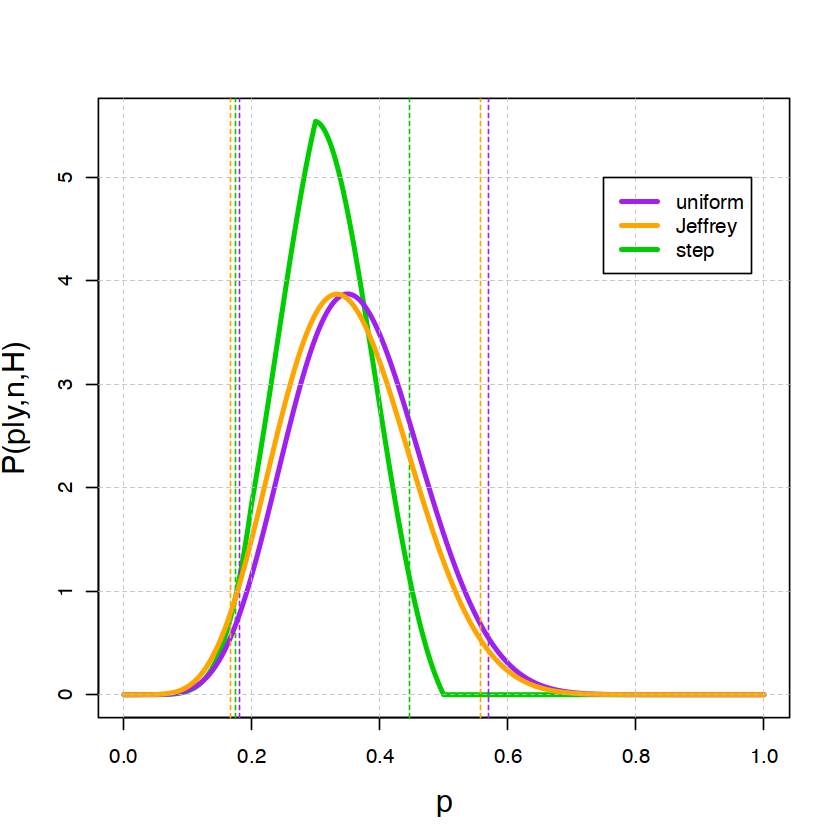

In [4]:
# PLOT
plot(p, step_posterior, type = "l", col = "green3", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
abline(v = step_min, lty = 2, lwd = 1, col = "green3")
abline(v = step_max, lty = 2, lwd = 1, col = "green3")

lines(p, unif_posterior, type = "l", col = "purple", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
abline(v = unif_min, lty = 2, lwd = 1, col = "purple")
abline(v = unif_max, lty = 2, lwd = 1, col = "purple")

lines(p, jeff_posterior, type = "l", col = "orange", lwd = 3, cex.lab = 1.5, xlab = "p", ylab = "P(p|y,n,H)")
abline(v = jeff_min, lty = 2, lwd = 1, col = "orange")
abline(v = jeff_max, lty = 2, lwd = 1, col = "orange")

grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 0.5)

legend(0.75, 5, legend = c("uniform", "Jeffrey", "step"), col = c("purple", "orange", "green3"), lty = 1,, lwd = 3, cex = 1)


In [10]:
# SUMMARY TABLE
prior_dist <- c("uniform", "Jeffrey's", "step")
mean <- c(round(unif_mean, 3), round(jeff_mean, 3), round(step_mean, 3))
sigma <- c(round(unif_sigma, 3), round(jeff_sigma, 3), round(step_sigma, 3))
min_conf.int <- c(unif_min, jeff_min, step_min)
max_conf.int <- c(unif_max, jeff_max, step_max)

df <- data.frame(prior_dist, mean, sigma, min_ci = min_conf.int, max_ci = max_conf.int)
print(df)

  prior_dist  mean sigma min_ci max_ci
1    uniform 0.364 0.100  0.181  0.570
2  Jeffrey's 0.349 0.100  0.168  0.557
3       step 0.312 0.071  0.175  0.447
